In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians

In [2]:
TMA_lon = [15.9854, 15.7247, 15.4078, 15.3864, 15.6594, 16.0503, 16.2683, 16.4347, 17.0932, 17.1607, 16.9543, 16.9061, 16.5407, 15.9854];

TMA_lat = [48.7869, 48.7339, 48.2864, 48.1267, 47.8739, 47.5028, 47.2939, 47.2395, 47.7082, 48.0066, 48.5436, 48.7150, 48.8143, 48.7869];
 
def plot_TMA_LOWW():
       
    #rwy1_lon=[, ];
    #rwy1_lat=[, ];

    #rwy2_lon=[, ];
    #rwy2_lat=[, ];

    plt.plot(TMA_lon, TMA_lat, color="blue")
    #plt.plot(rwy1_lon,rwy1_lat, color="red")
    #plt.plot(rwy2_lon,rwy2_lat, color="red")
    
    #ELTOK_lon = 16.6503
    #ELTOK_lat = 59.5861

    #plt.plot(ELTOK_lon, ELTOK_lat, 'ro')

In [3]:
central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
print(min(TMA_lat))
print(max(TMA_lat))
print(central_latitude)

print(min(TMA_lon))
print(max(TMA_lon))

47.2395
48.8143
48.0269
15.3864
17.1607


In [4]:
 def plot_horizontal_profile_LOWW(df, runway, linewidth):
    
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_LOWW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        for seq, row in flight_states_opensky_df.groupby(level='sequence'):
        
            lon.append(row['lon'].item())
            lat.append(row['lat'].item())
            
        #last_points_lon = lon[-30:]
        #last_points_lat = lat[-30:]
        plt.plot(lon, lat, color='k', linewidth=linewidth)
        #plt.plot(last_points_lon, last_points_lat, color='r', linewidth=linewidth)

In [5]:
def plot_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['altitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)


In [6]:
def plot_raw_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['rawAltitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [37]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1_old.csv"
#filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1.csv"
LOWW_states_2019_10_week1_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
LOWW_states_2019_10_week1_df.set_index(['flight_id', 'sequence'], inplace = True)

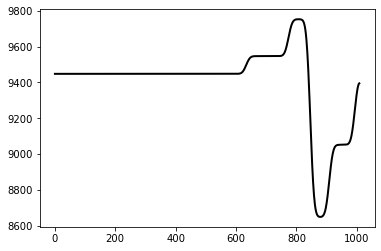

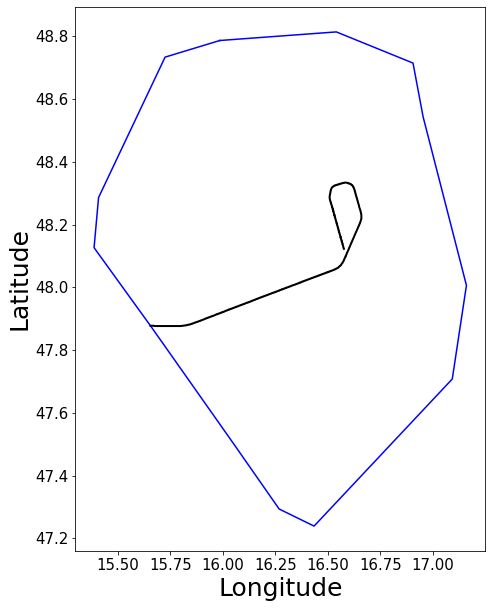

In [50]:
df = LOWW_states_2019_10_week1_df
flight_df = df[df.index.get_level_values('flight_id') == '191004AUA474']
plot_vertical_profile(flight_df, 0, 2)
#plot_raw_vertical_profile(flight_df, 0, 2)
plot_horizontal_profile_LOWW(flight_df, "x", 2)

In [15]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1.csv"
df = LOWW_states_2019_10_week1_df
#df = df.drop("")
df = df.drop("191001LDM29Z")
df = df.drop("191001LDM748Z")
df = df.drop("191001AUA240")
df = df.drop("191001AUA565R")
df = df.drop("191001EWG3JP")
df = df.drop("191001AUA226")
df = df.drop("191002WZZ238")
df = df.drop("191002C33")
df = df.drop("191002AUA132")
df = df.drop("191003AUA52")
df = df.drop("191003AUA6TR")
df = df.drop("191003AUA4059")
df = df.drop("191003BTI2UK")
df = df.drop("191003CHH789")
df = df.drop("191003EWG5273")    # big fluctuation on the second sequence, todo: fix
df = df.drop("191004AUA134")
df = df.drop("191004WZZ248")
df = df.drop("191004CSN662")
df = df.drop("191004AUA77H")
df = df.drop("191004AUA41A")    #altitude on the first sequence is 0, todo: fix
df = df.drop("191004AUA474")
df = df.drop("191004WZZ6127")
df = df.drop("191005AUA95HK")
df = df.drop("191005LDM748Z")
df = df.drop("191005AUA134")
df = df.drop("191005C2")
df = df.drop("191005MJF6B")
df = df.drop("191005AUA9412")
df = df.drop("191006EWG7HB")
df = df.drop("191006LDM5ST")
df = df.drop("191006AUA174")
df = df.drop("191006AUA336")
df = df.drop("191006KLM64X")
df = df.drop("191006AUA568")
df = df.drop("191007AIC120")
df = df.drop("191007AUA336")

df.to_csv(filename, sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)

In [ ]:
plot_horizontal_profile_LOWW(df, "x", 2)

In [ ]:
plot_vertical_profile(df, 0, 2)